In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

df = pd.read_csv("Electric_Vehicle_Population_Data.csv")
df.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [3]:
df.info()
df = df.dropna()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

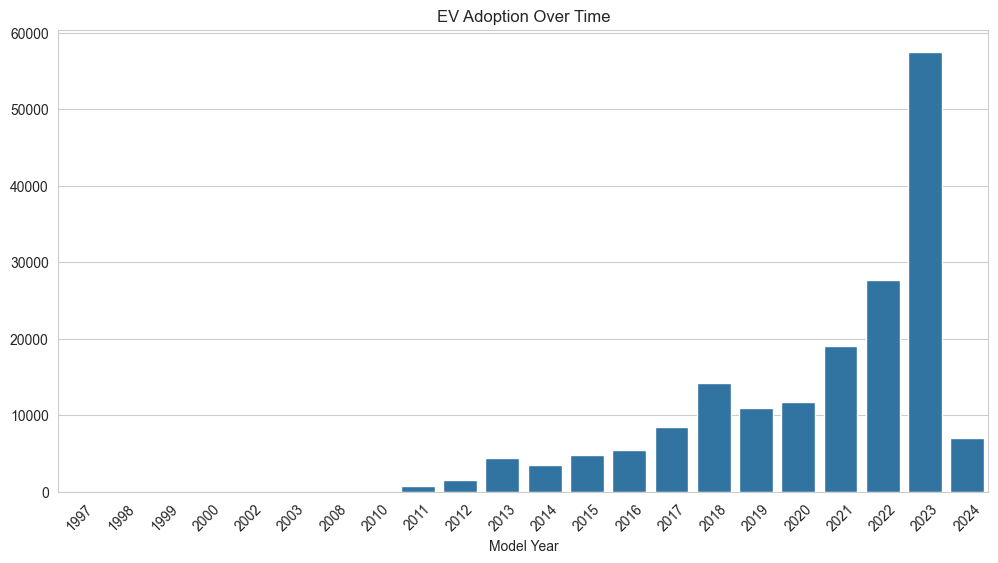

In [4]:
plt.figure(figsize=(12, 6))
counts = df["Model Year"].value_counts().sort_index()

sns.barplot(x=counts.index, y=counts.values)
plt.title("EV Adoption Over Time")
plt.xticks(rotation=45)
plt.show()


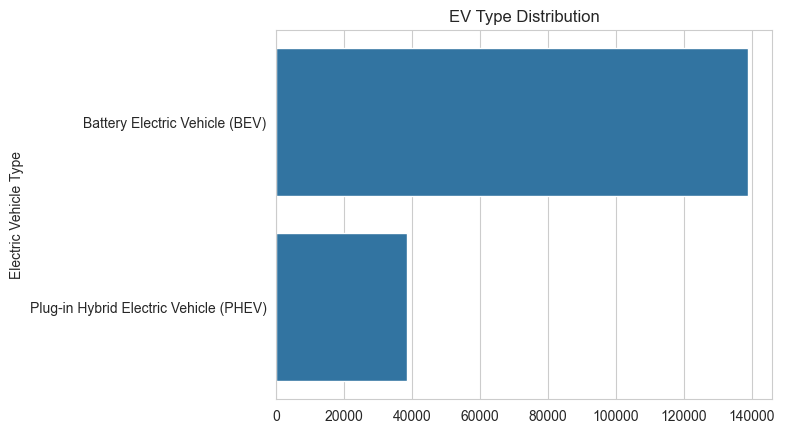

In [5]:
ev_types = df["Electric Vehicle Type"].value_counts()

sns.barplot(x=ev_types.values, y=ev_types.index)
plt.title("EV Type Distribution")
plt.show()


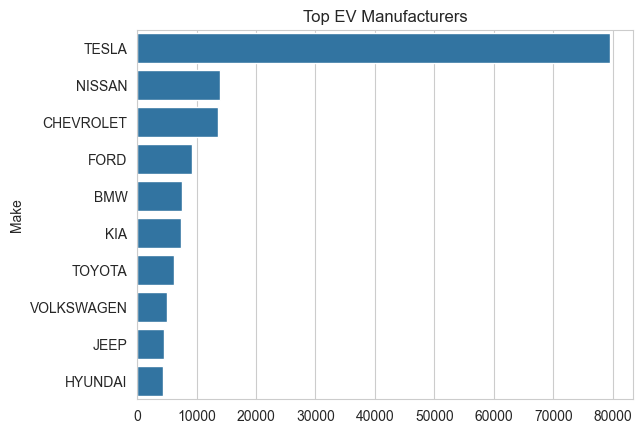

In [6]:
top_makes = df["Make"].value_counts().head(10)

sns.barplot(x=top_makes.values, y=top_makes.index)
plt.title("Top EV Manufacturers")
plt.show()


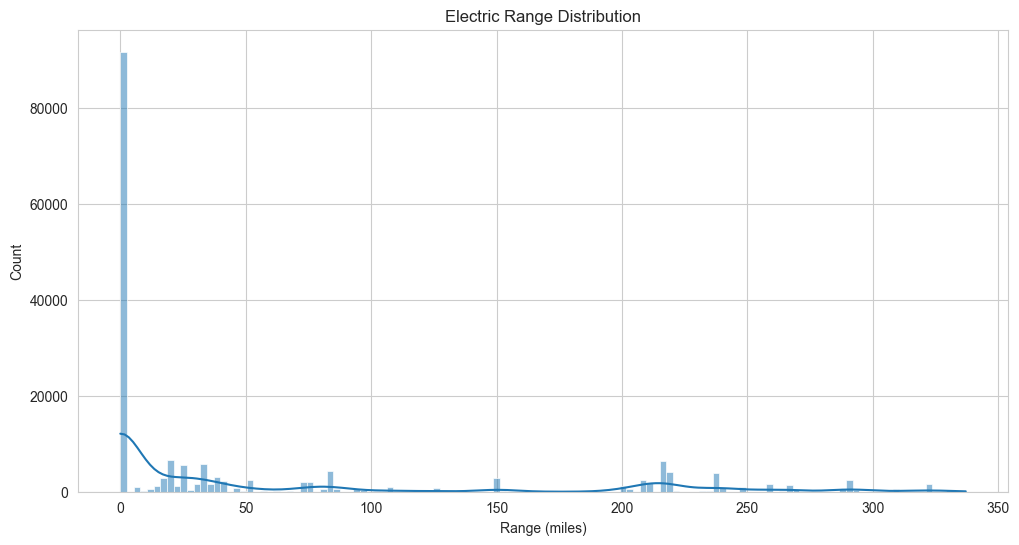

In [7]:
plt.figure(figsize=(12, 6))
sns.histplot(df["Electric Range"], kde=True)
plt.title("Electric Range Distribution")
plt.xlabel("Range (miles)")
plt.show()


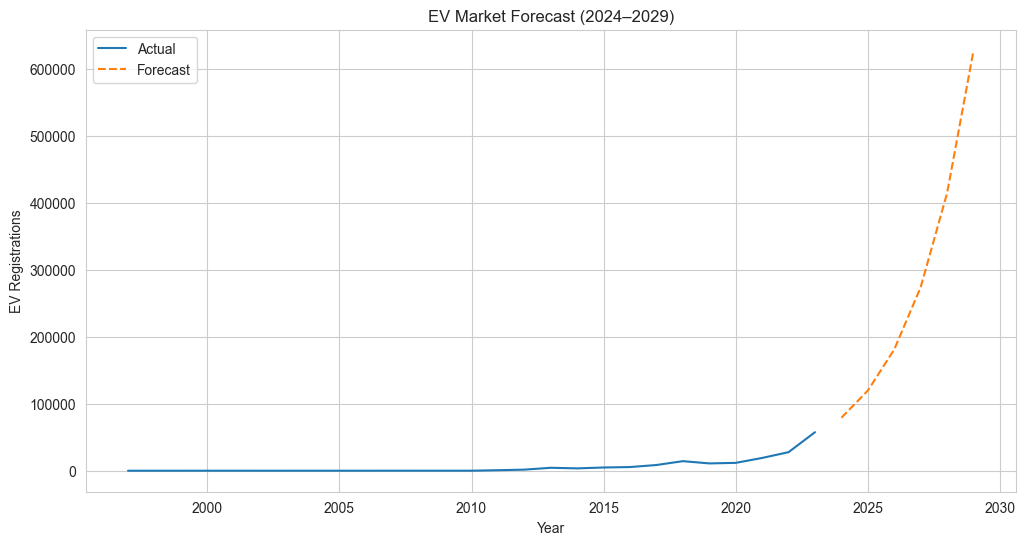

In [8]:
from scipy.optimize import curve_fit

def exp_growth(x, a, b):
    return a * np.exp(b * x)

# actual data
year_counts = df["Model Year"].value_counts().sort_index()
year_counts = year_counts[year_counts.index <= 2023]

x = year_counts.index - year_counts.index[0]
y = year_counts.values

params, _ = curve_fit(exp_growth, x, y)
a, b = params

# forecast future (2024–2029)
future_years = np.arange(2024, 2030)
future_x = future_years - year_counts.index[0]
future_y = exp_growth(future_x, a, b)

# plot results
plt.figure(figsize=(12, 6))
plt.plot(year_counts.index, year_counts.values, label="Actual")
plt.plot(future_years, future_y, '--', label="Forecast")
plt.title("EV Market Forecast (2024–2029)")
plt.xlabel("Year")
plt.ylabel("EV Registrations")
plt.legend()
plt.show()
